problem 1

number of trials: 1000
on average you won: 10.94
at max was won: 1024
in percentage with how much you want to surpass the money you payed to play: 18.05


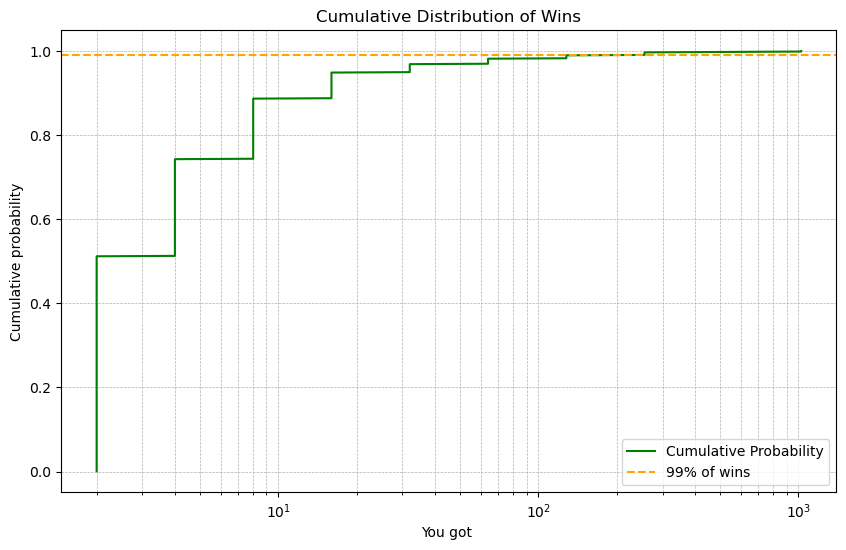

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def toss_coin(num_trials):
    temp = []
    for i in range(num_trials):
        attempts = 1
        while np.random.random() > 0.5: 
            # until heads
            attempts += 1
        temp.append(2 ** attempts)
    return temp

number_of_trials = int(input("How many times do you want to play: "))
wins = toss_coin(number_of_trials)

average_wins = sum(wins) / number_of_trials
highest_wins = max(wins)

# Ask the user for their desired profit margin
profit_margin = float(input("with how much in percents you want to surpass the amount you payed: "))
suggested_price = average_wins * (1 + profit_margin / 100)

print(f"number of trials: {number_of_trials}")
print(f"on average you won: {average_wins:.2f}")
print(f"at max was won: {highest_wins}")
print(f"in percentage with how much you want to surpass the money you payed to play: {suggested_price:.2f}")

sorted_wins = np.sort(wins)
cumulative_probability = np.arange(1, len(sorted_wins) + 1) / len(sorted_wins)

plt.figure(figsize=(10, 6))
plt.plot(sorted_wins, cumulative_probability, label='Cumulative Probability', color='green')
plt.axhline(0.99, color='orange', linestyle='--', label='99% of wins')
plt.title('Cumulative Distribution of Wins')
plt.xlabel('You got ')
plt.ylabel('Cumulative probability')
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

problem 2

for 6


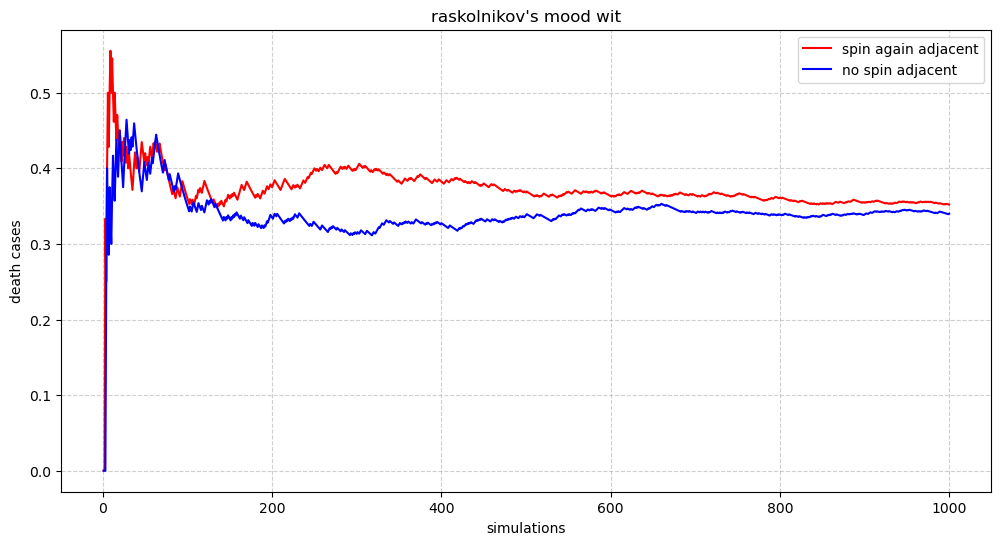

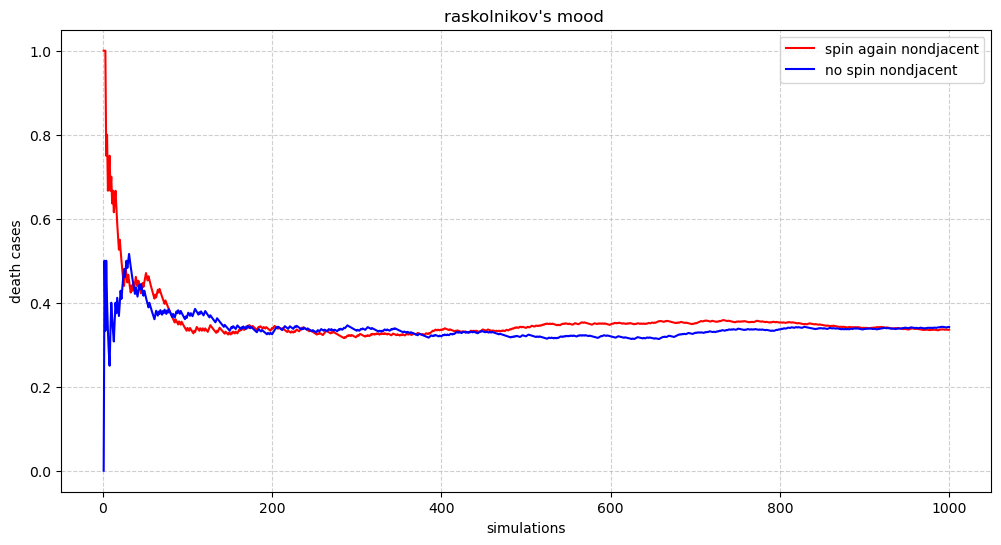

for 5


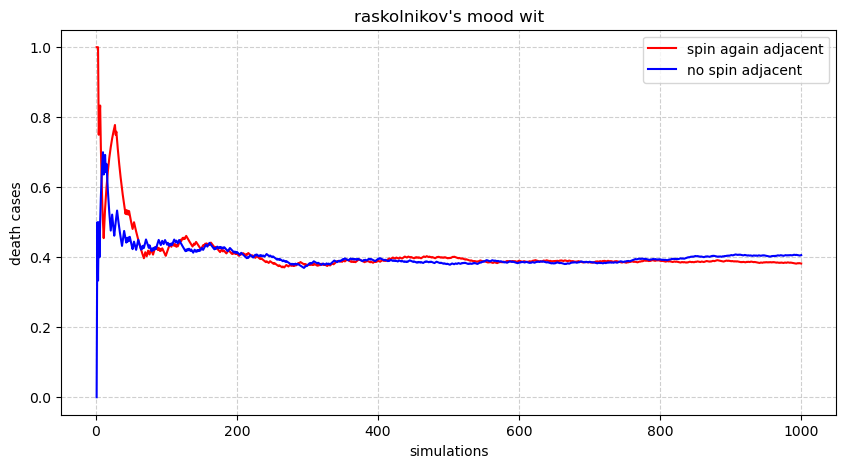

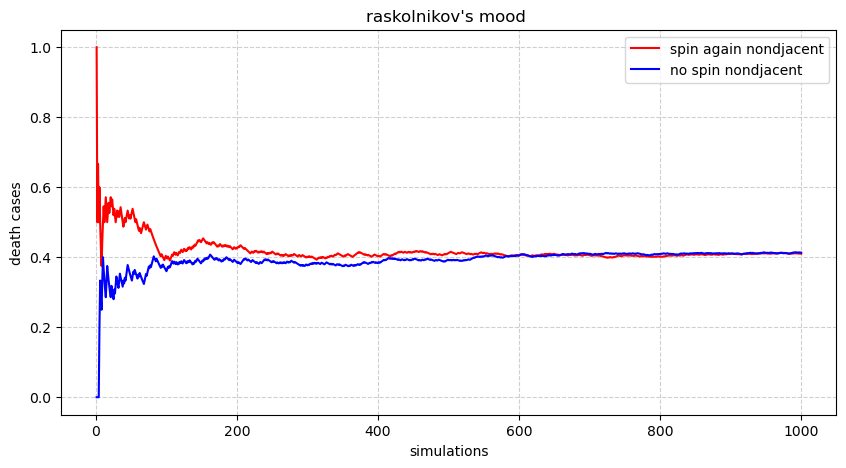

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

simulations = int(input("how many simulations"))
spin_again = True


def first_shot(adjacent):
    if adjacent:
        barrel = [1, 1, 0, 0, 0, 0]
        random.shuffle(barrel)
        return barrel
    else:
    
        barrel = [1, 0, 1, 0, 0, 0]
        random.shuffle(barrel)
        return barrel


def second_shot(barrel, spin_again):
    if spin_again:

        chamber = random.choice(barrel)
    else:
        first_shot_index = barrel.index(0)
        next_slot_index = (first_shot_index + 1) % 6
        chamber = barrel[next_slot_index]
    return chamber == 1  

def run_simulation(simulations, spin_again, adjacent):
    deaths = 0
    probabilities = []
    for i in range(1, simulations + 1):
        barrel = first_shot(adjacent)
        if 0 in barrel:  
            if second_shot(barrel, spin_again):
                deaths += 1
        probabilities.append(deaths / i)
    return probabilities

prob_spin_adjacent = run_simulation(simulations, spin_again=True, adjacent=True)
prob_no_spin_adjacent = run_simulation(simulations, spin_again=False, adjacent=True)

prob_spin_non_adjacent = run_simulation(simulations, spin_again=True, adjacent=False)
prob_no_spin_non_adjacent = run_simulation(simulations, spin_again=False, adjacent=False)

print("for 6")
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, simulations + 1), prob_spin_adjacent, label="spin again adjacent", color="r")
plt.plot(np.arange(1, simulations + 1), prob_no_spin_adjacent, label="no spin adjacent", color="b")
plt.title("raskolnikov's mood wit")
plt.xlabel("simulations")
plt.ylabel("death cases")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, simulations + 1), prob_spin_non_adjacent, label="spin again nondjacent", color="r")
plt.plot(np.arange(1, simulations + 1), prob_no_spin_non_adjacent, label="no spin nondjacent", color="b")
plt.title("raskolnikov's mood ")
plt.xlabel("simulations")
plt.ylabel("death cases")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


def first_shot(adjacent):
    if adjacent:
        barrel = [1, 1, 0, 0, 0]
        random.shuffle(barrel)
        return barrel
    else:
    
        barrel = [1, 0, 1, 0, 0]
        random.shuffle(barrel)
        return barrel


def second_shot(barrel, spin_again):
    if spin_again:

        chamber = random.choice(barrel)
    else:
        first_shot_index = barrel.index(0)
        next_slot_index = (first_shot_index + 1) % 5
        chamber = barrel[next_slot_index]
    return chamber == 1  

def run_simulation(simulations, spin_again, adjacent):
    deaths = 0
    probabilities = []
    for i in range(1, simulations + 1):
        barrel = first_shot(adjacent)
        if 0 in barrel: 
            if second_shot(barrel, spin_again):
                deaths += 1
        probabilities.append(deaths / i)
    return probabilities

prob_spin_adjacent = run_simulation(simulations, spin_again=True, adjacent=True)
prob_no_spin_adjacent = run_simulation(simulations, spin_again=False, adjacent=True)

prob_spin_non_adjacent = run_simulation(simulations, spin_again=True, adjacent=False)
prob_no_spin_non_adjacent = run_simulation(simulations, spin_again=False, adjacent=False)

print("for 5")
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, simulations + 1), prob_spin_adjacent, label="spin again adjacent", color="r")
plt.plot(np.arange(1, simulations + 1), prob_no_spin_adjacent, label="no spin adjacent", color="b")
plt.title("raskolnikov's mood wit")
plt.xlabel("simulations")
plt.ylabel("death cases")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, simulations + 1), prob_spin_non_adjacent, label="spin again nondjacent", color="r")
plt.plot(np.arange(1, simulations + 1), prob_no_spin_non_adjacent, label="no spin nondjacent", color="b")
plt.title("raskolnikov's mood ")
plt.xlabel("simulations")
plt.ylabel("death cases")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



problem 3

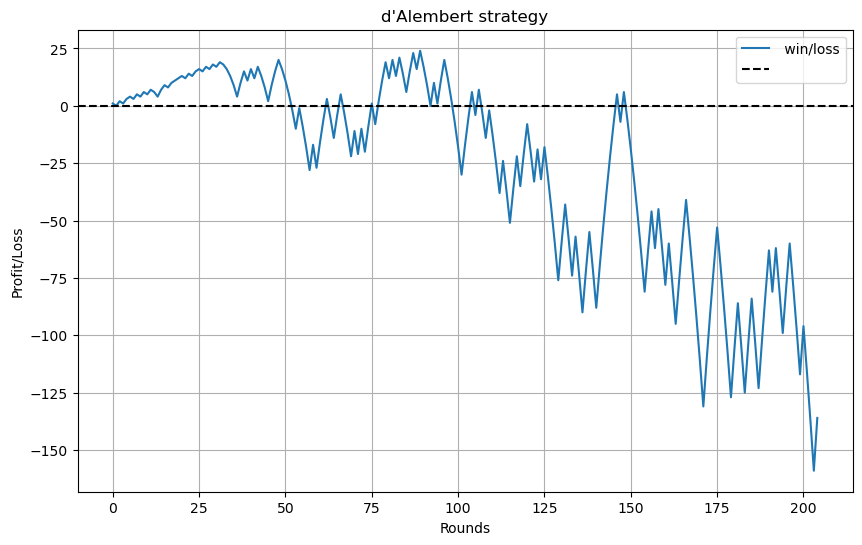

total rounds: 205
total wins: 95
money left in tha pokets: -131


In [5]:
import random
import matplotlib.pyplot as plt

initial_bet = 1 
max_rounds = int(input("how many rounds")) 
target_wins = int(input("how many times you want to win "))
starting_balance = int(input("money in your poket/ initial balance"))

# european roulette
win_probability = 18 / 37
loss_probability = 1 - win_probability

def d_alembert_simulation():
    balance = starting_balance
    bet = initial_bet
    wins = 0
    rounds = 0
    profit_history = []
    
    while rounds < max_rounds and wins < target_wins:
        if random.random() < win_probability:
            balance += bet
            wins += 1
            bet = max(bet - 1, 1)  
        else:  # Lose condition
            balance -= bet
            bet += 1  
        
        rounds += 1
        profit_history.append(balance - starting_balance) 

    return profit_history, rounds, wins


profit_history, rounds, wins = d_alembert_simulation()

plt.figure(figsize=(10, 6))
plt.plot(profit_history, label=" win/loss")
plt.axhline(0, color='black', linestyle='--', label=" ")
plt.title("d'Alembert strategy")
plt.xlabel("Rounds")
plt.ylabel("Profit/Loss")
plt.legend()
plt.grid(True)
plt.show()


print(f"total rounds: {rounds}")
print(f"total wins: {wins}")
print(f"money left in tha pokets: {profit_history[-1] + starting_balance}")


problem 4

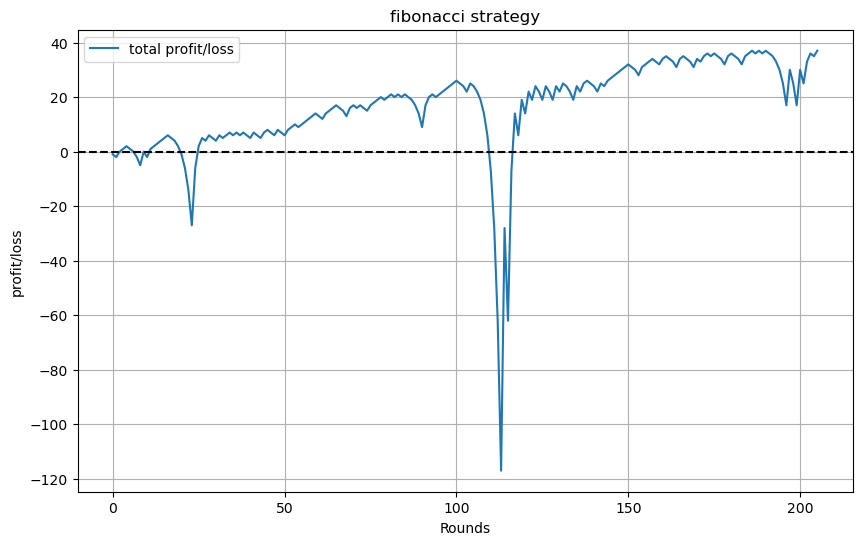

rounds played: 206
wins : 100
final money in your poket: 47


In [6]:
import random
import matplotlib.pyplot as plt

initial_bet = 1 
max_rounds = int(input("how many rounds")) 
target_wins = int(input("how many times you want to win "))
starting_balance = int(input("money in your poket/ initial balance"))

def fibonacci_sequence(n):
    fib = [1, 1]
    for i in range(2, n):
        fib.append(fib[-1] + fib[-2])
    return fib

win_probability = 18 / 37
loss_probability = 1 - win_probability


def fibonacci_simulation():
    balance = starting_balance
    sequence = fibonacci_sequence(max_rounds) 
    current_bet_index = 0 
    wins = 0
    rounds = 0
    profit_history = []
    
    while rounds < max_rounds and wins < target_wins:
        if random.random() < win_probability:
            balance += sequence[current_bet_index]
            wins += 1
            current_bet_index = max(0, current_bet_index - 2)
        else:
            balance -= sequence[current_bet_index]
            current_bet_index += 1
        
        rounds += 1
        profit_history.append(balance - starting_balance) 

    return profit_history, rounds, wins

profit_history, rounds, wins = fibonacci_simulation()


plt.figure(figsize=(10, 6))
plt.plot(profit_history, label="total profit/loss")
plt.axhline(0, color='black', linestyle='--', label="")
plt.title("fibonacci strategy")
plt.xlabel("Rounds")
plt.ylabel("profit/loss")
plt.legend()
plt.grid(True)
plt.show()

# Output the results
print(f"rounds played: {rounds}")
print(f"wins : {wins}")
print(f"final money in your poket: {profit_history[-1] + starting_balance}")


problem 5

In [7]:
import string
import random
import hashlib

def generate_collision_md5(bits):
    k=0
    seen_hashes={}
    num_hexa_char = bits // 4 #hex digit = 4 bits

    while (True):
        #generate a string and encode it
        rand_string = ''.join(random.choices(string.ascii_letters + string.digits, k=8)).encode()
        md5_hash = hashlib.md5(rand_string).hexdigest()
        truncated_hash = md5_hash[:num_hexa_char]

        if truncated_hash in seen_hashes:
            return rand_string.decode(), seen_hashes[truncated_hash],k
        else:
            seen_hashes[truncated_hash] = rand_string.decode()
            k+=1

same_hash_1, same_hash_2, number_of_atempts = generate_collision_md5(20)
print("Here are the strings: ",same_hash_1, same_hash_2)
print("Here the hashes, see that first 5 characters coincide: ",hashlib.md5(same_hash_1.encode()).hexdigest(),
      hashlib.md5(same_hash_2.encode()).hexdigest())
print("number of atempts: ",number_of_atempts)

same_hash_1, same_hash_2, number_of_atempts = generate_collision_md5(40)
print("Here are the strings: ",same_hash_1, same_hash_2)
print("Here the hashes, see that first 10 characters coincide: ",hashlib.md5(same_hash_1.encode()).hexdigest(),
      hashlib.md5(same_hash_2.encode()).hexdigest())
print("number of atempts: ",number_of_atempts)

Here are the strings:  wFDVrXHq NTy3Xobd
Here the hashes, see that first 5 characters coincide:  c953c02f97f296e8e183f292d50aeb5a c953cbccae852954023edbf8ca0e7163
number of atempts:  749
Here are the strings:  rVrrRrmA aVKgVgun
Here the hashes, see that first 10 characters coincide:  06835b0ee250087b22d823376ddc60ac 06835b0ee2f0694811994b86ac1bec8e
number of atempts:  791322


In [8]:
import hashlib
import random
import string

def generate_random_string(length=10):
    return ''.join(random.choices(string.ascii_lowercase + string.digits, k=length))

def md5_hash(input_string):
    return hashlib.md5(input_string.encode('utf-8')).hexdigest()

def birthday_attack(target_bits=40):
    seen_hashes = {}
    
    while True:
        random_input = generate_random_string()
        hash_value = md5_hash(random_input)
        truncated_hash = hash_value[:target_bits // 4]
        
        if truncated_hash in seen_hashes:
            print(f"found collision")
            print(f"Input 1: {seen_hashes[truncated_hash]}")
            print(f"Input 2: {random_input}")
            print(f"Hash: {truncated_hash}")
            return
        
        seen_hashes[truncated_hash] = random_input

birthday_attack(target_bits=40)

found collision
Input 1: 4m1kvkm3xt
Input 2: rjjrv1v9m9
Hash: ea5734dbbc


bonus problem 

In [10]:
import random
from PIL import Image

temp = 0
image = Image.open("unnamed.png")

number_of_bombs = int(input("the nuber of bombs: "))
x_max, y_max = image.size
red_threshold = 150
green_threshold = 100
blue_threshold = 100

for a in range(number_of_bombs):
    x = random.randint(0, x_max - 1)
    y = random.randint(0, y_max - 1)
    r, g, b = image.getpixel((x, y))[:3]

    if (r >= red_threshold) and (g <= green_threshold) and (b <= blue_threshold):
        temp += 1

area = (temp / number_of_bombs) * 42
print("the area is about", area)

the area is about 11.742301458670989
